In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [52]:
from PIL import Image
# img = Image.open('data/test_dir/123.png').convert('L')

# img = Image.open('data/training-synthetic/0001_0_0_0_30_0_1.pgm').convert('L')


IMAGES = []
KEYS = []

for person in range(10):
    for angle in range(9):
        for light1 in range(6):
            for light2 in range(6):
                p = '000'+str(person)
                a = f'{-4 * angle}_0_0'
                l1 = 15 + light1*15
                l2 = light2 * 15

                if person >= 6:
                    IMAGES.append(Image.open(f'data/training-synthetic/{p}_{a}_0_{l1}_{l2}_1.pgm').convert('L'))
                else:
                    IMAGES.append(Image.open(f'data/training-synthetic/{p}_{a}_{l1}_{l2}_1.pgm').convert('L'))

                # KEYS.append(
                #     {'person': person,
                #      'angle': -4 * angle,
                #      'light1': 15 + light1*15,
                #      'light2': light2 * 15
                #      })

                KEYS.append(
                    {'person': person,
                     'angle': angle,
                     'light1': light1,
                     'light2': light2
                     })



In [53]:
KEYS[10]

{'person': 0, 'angle': 0, 'light1': 1, 'light2': 4}

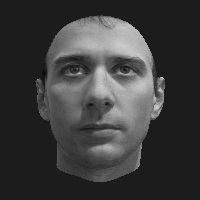

In [42]:
IMAGES[10]

In [69]:
import torch

rank_4_tensor = tf.zeros([10, 9, 36, 40000])

rank_4_tensor = torch.empty((10, 9, 36, 40000), dtype=torch.int64)



rank_4_tensor

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 

In [87]:

IMAGES_TENSOR = []

for img in IMAGES:
    image_np = np.array(img)
    IMAGES_TENSOR.append( torch.tensor(np.concatenate(image_np)))


In [88]:
IMAGES_TENSOR[0]

tensor([28, 28, 28,  ..., 28, 28, 28], dtype=torch.uint8)

In [44]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (10, 9, 36, 40000)
Elements along axis 0 of tensor: 10
Elements along the last axis of tensor: 40000
Total number of elements (3*2*4*5):  129600000


In [63]:
tns = tf.convert_to_tensor(
    rank_4_tensor, dtype=None, dtype_hint=None, name=None
)

tns

<tf.Tensor: shape=(10, 9, 36, 40000), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..

In [89]:

tns = rank_4_tensor


for key,tens in zip(KEYS,IMAGES_TENSOR):
    tns[key['person']][key['angle']][key['light1']*6+key['light2']] = tens




In [92]:
tns[0][1][0]

tensor([28, 28, 28,  ..., 28, 28, 28])

In [ ]:
def svd(mat):
    for n in range(4):
        flt = torch.flatten(tns,n,n)

        s, u, v = tf.linalg.svd(flt, full_matrices=False, compute_uv=True, name=None)

In [67]:
import torch
tfs = tf.convert_to_tensor(
    rank_4_tensor, dtype=None, dtype_hint=None, name=None
)
torch.flatten(tfs, start_dim=1)

TypeError: flatten(): argument 'input' (position 1) must be Tensor, not tensorflow.python.framework.ops.EagerTensor

In [94]:
temp = torch.tensor(np.array([[[1,2],[3,4]], [[5,6], [7,8]]]))
temp

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [105]:
temp[0]

tensor([[1, 2],
        [3, 4]])

In [142]:
flt = torch.flatten(temp,0)
flt

tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [133]:
temp.unfold(1,2,2)

tensor([[[[1, 3],
          [2, 4]]],


        [[[5, 7],
          [6, 8]]]])